<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [3]:
# I addeed this method to get file as wget was not working for me.
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
response = requests.get(url)

# Save the content to a file
with open('m4_survey_data.sqlite', 'wb') as file:
    file.write(response.content)

print("File downloaded successfully")


File downloaded successfully


In [5]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [7]:
import pandas as pd

## Demo: How to run an sql query


In [9]:
# print how many rows are there in the table named 'master'
QUERY = "SELECT COUNT(*) FROM master"

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [43]:
# print all the tables names in the database
QUERY = "SELECT name as Table_Name FROM sqlite_master WHERE type = 'table'"

# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [13]:
QUERY = "SELECT Age,COUNT(*) as count FROM master group by age order by age"

pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [15]:
table_name = 'master'  # the table you wish to describe

QUERY = "SELECT sql FROM sqlite_master WHERE name= '{}'".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


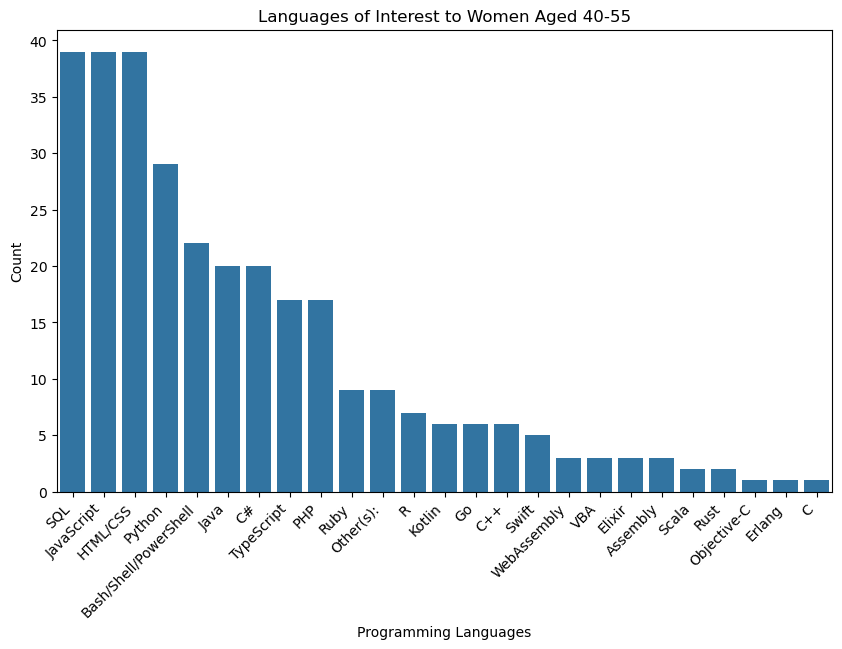

In [49]:
# Visualization of my own interest not per the lab

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Query to get languages of interest to older females
QUERY = """
SELECT l.LanguageDesireNextYear, COUNT(*) as count
FROM master m
JOIN Gender g ON m.Respondent = g.Respondent
JOIN LanguageDesireNextYear l ON m.Respondent = l.Respondent
WHERE m.Age BETWEEN 40 AND 55 AND g.Gender = 'Woman'
GROUP BY l.LanguageDesireNextYear
ORDER BY count DESC;
"""
df=pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10,6))
sns.barplot(x=df['LanguageDesireNextYear'], y=df['count'])
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.title('Languages of Interest to Women Aged 40-55')
plt.show()


C:\Users\jenjo\AppData\Local\Temp\ipykernel_19996\414177915.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], kde=False, bins=30)


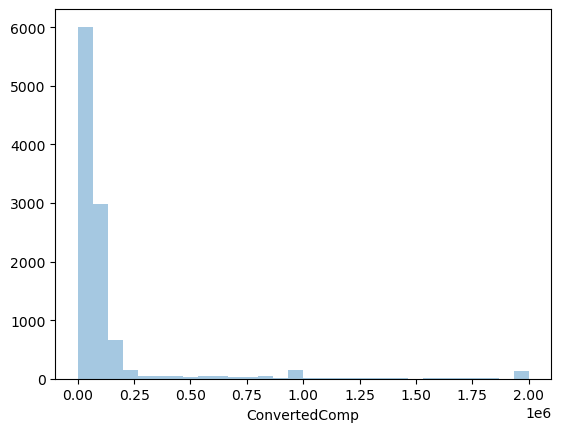

In [33]:
# your code goes here
#!pip install --upgrade seaborn

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

QUERY = "SELECT ConvertedComp FROM master"
df=pd.read_sql_query(QUERY, conn)

sns.distplot(df['ConvertedComp'], kde=False, bins=30)
plt.show()




### Box Plots


Plot a box plot of `Age.`


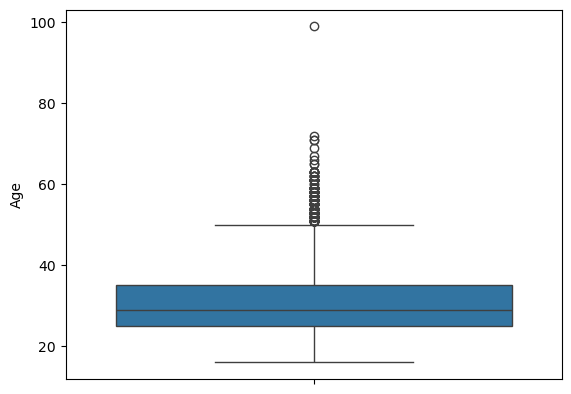

In [35]:
# your code goes here

QUERY = "SELECT Age FROM master"
df=pd.read_sql_query(QUERY, conn)

sns.boxplot(df['Age'])
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


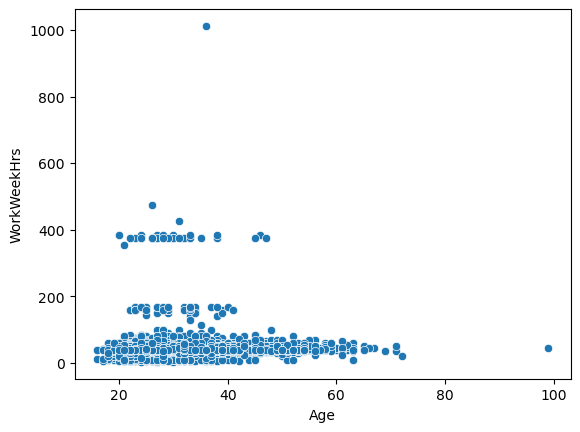

In [21]:
# your code goes here

QUERY = "SELECT Age, WorkWeekHrs FROM master"
df=pd.read_sql_query(QUERY, conn)

sns.scatterplot(x=df['Age'], y=df['WorkWeekHrs'])
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


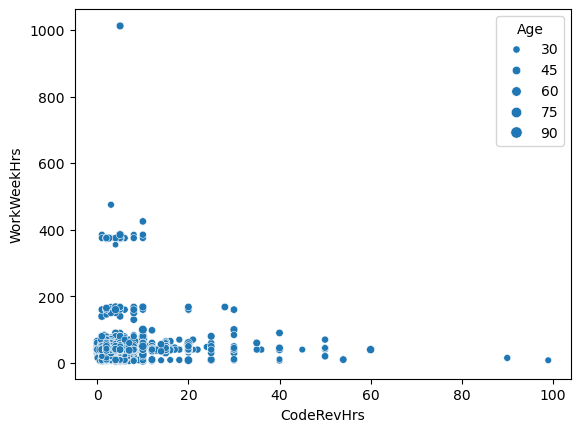

In [23]:
# your code goes here

QUERY = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master"
df=pd.read_sql_query(QUERY, conn)

sns.scatterplot(x=df['CodeRevHrs'], y=df['WorkWeekHrs'], size=df['Age'])
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [23]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = "SELECT sql FROM sqlite_master WHERE name= '{}'".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


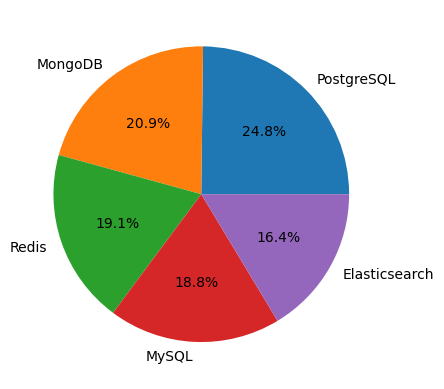

In [53]:
# your code goes here

QUERY = "SELECT DatabaseDesireNextYear, COUNT(*) as count FROM DatabaseDesireNextYear group by DatabaseDesireNextYear ORDER BY count DESC LIMIT 5;"
df=pd.read_sql_query(QUERY, conn)

plt.pie(df['count'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%')
plt.show()

In [63]:
QUERY = "SELECT LanguageDesireNextYear, COUNT(*) as count FROM LanguageDesireNextYear group by LanguageDesireNextYear ORDER BY count DESC;"
df=pd.read_sql_query(QUERY, conn)

df.value_counts()



LanguageDesireNextYear  count
Assembly                336      1
Bash/Shell/PowerShell   3097     1
VBA                     149      1
TypeScript              4088     1
Swift                   1179     1
Scala                   879      1
SQL                     5012     1
Rust                    1520     1
Ruby                    1029     1
R                       850      1
Python                  5239     1
PHP                     1457     1
Other(s):               836      1
Objective-C             310      1
Kotlin                  1890     1
JavaScript              6630     1
Java                    2953     1
HTML/CSS                5328     1
Go                      2759     1
F#                      621      1
Erlang                  310      1
Elixir                  620      1
Dart                    610      1
Clojure                 413      1
C++                     1633     1
C#                      3591     1
C                       1028     1
WebAssembly             1

In [64]:
QUERY = "SELECT LanguageWorkedWith, COUNT(*) as count FROM LanguageWorkedWith group by LanguageWorkedWith ORDER BY count DESC;"
df=pd.read_sql_query(QUERY, conn)

df.value_counts()

LanguageWorkedWith     count
Assembly               437      1
Bash/Shell/PowerShell  4642     1
VBA                    628      1
TypeScript             3232     1
Swift                  707      1
Scala                  492      1
SQL                    7106     1
Rust                   324      1
Ruby                   1149     1
R                      585      1
Python                 4542     1
PHP                    2913     1
Other(s):              840      1
Objective-C            518      1
Kotlin                 751      1
JavaScript             8687     1
Java                   4506     1
HTML/CSS               7830     1
Go                     1114     1
F#                     158      1
Erlang                 98       1
Elixir                 187      1
Dart                   237      1
Clojure                164      1
C++                    1946     1
C#                     4288     1
C                      1578     1
WebAssembly            133      1
dtype: int64

In [71]:
table_name = 'DatabaseWorkedWith'  # the table you wish to describe

QUERY = "SELECT sql FROM sqlite_master WHERE name= '{}'".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DatabaseWorkedWith" (
"Respondent" INTEGER,
  "DatabaseWorkedWith" TEXT
)


In [74]:
QUERY = """
SELECT Respondent, DatabaseWorkedWith
FROM DatabaseWorkedWith
GROUP BY Respondent, DatabaseWorkedWith
HAVING COUNT(DatabaseWorkedWith) = 1;
"""

df=pd.read_sql_query(QUERY, conn)

mysql_count = df[df['DatabaseWorkedWith'] == 'MySQL'].shape[0]

print(f"Number of respondents with only MySQL: {mysql_count}")

Number of respondents with only MySQL: 5469


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Figure size 1000x600 with 0 Axes>

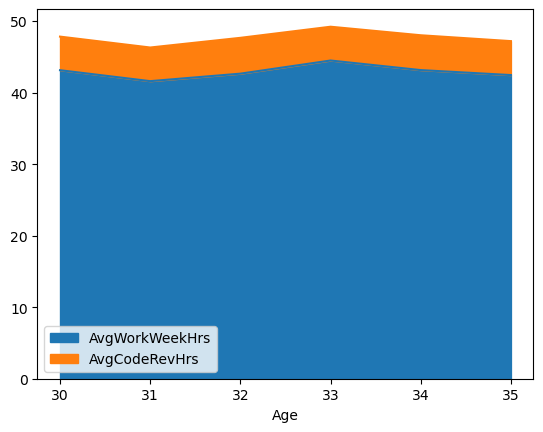

In [43]:
# your code goes here
QUERY = """
SELECT Age, AVG(WorkWeekHrs) AS AvgWorkWeekHrs, AVG(CodeRevHrs) AS AvgCodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
GROUP BY Age;
"""
df=pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
df.plot(kind='area', x='Age', stacked=True)
plt.show()



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Figure size 1000x600 with 0 Axes>

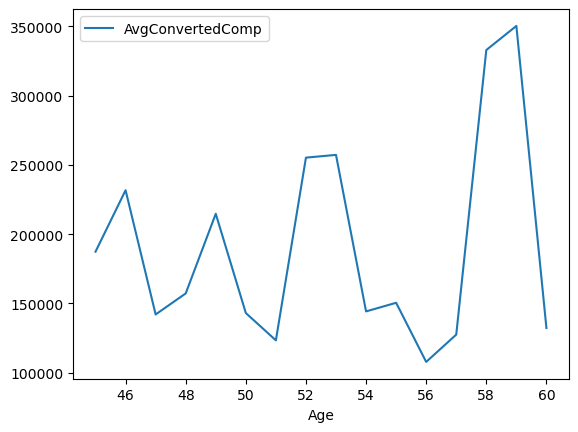

In [44]:
# your code goes here
QUERY = """
SELECT Age, AVG(ConvertedComp) AS AvgConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
GROUP BY Age;
"""
df=pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
df.plot(kind='line', x='Age')
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Figure size 1000x600 with 0 Axes>

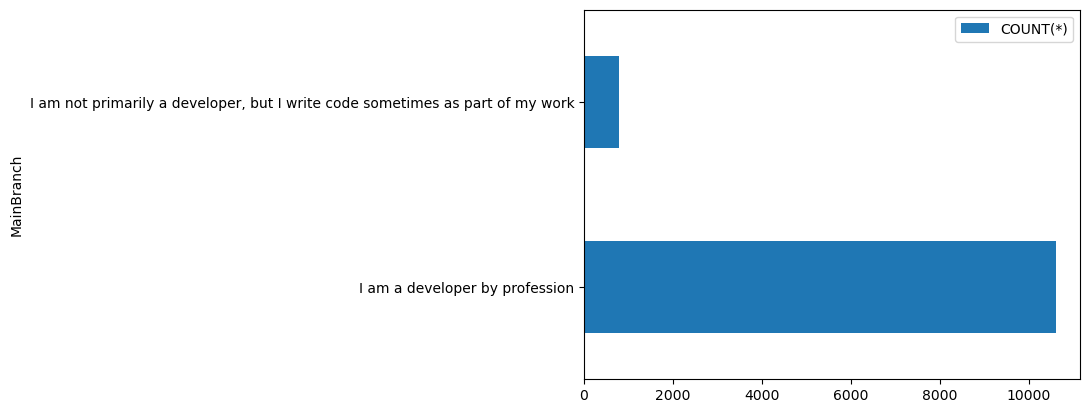

In [49]:
# your code goes here
QUERY = """
SELECT MainBranch, COUNT(*)
FROM master
GROUP BY MainBranch
;
"""
df=pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
df.plot(kind='barh', x='MainBranch')
plt.show()


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
